# **\[GPT\]** Models

SEOYEON CHOI  
2024-03-01

In [1]:
# bibliography: ref.bib

# flowchart

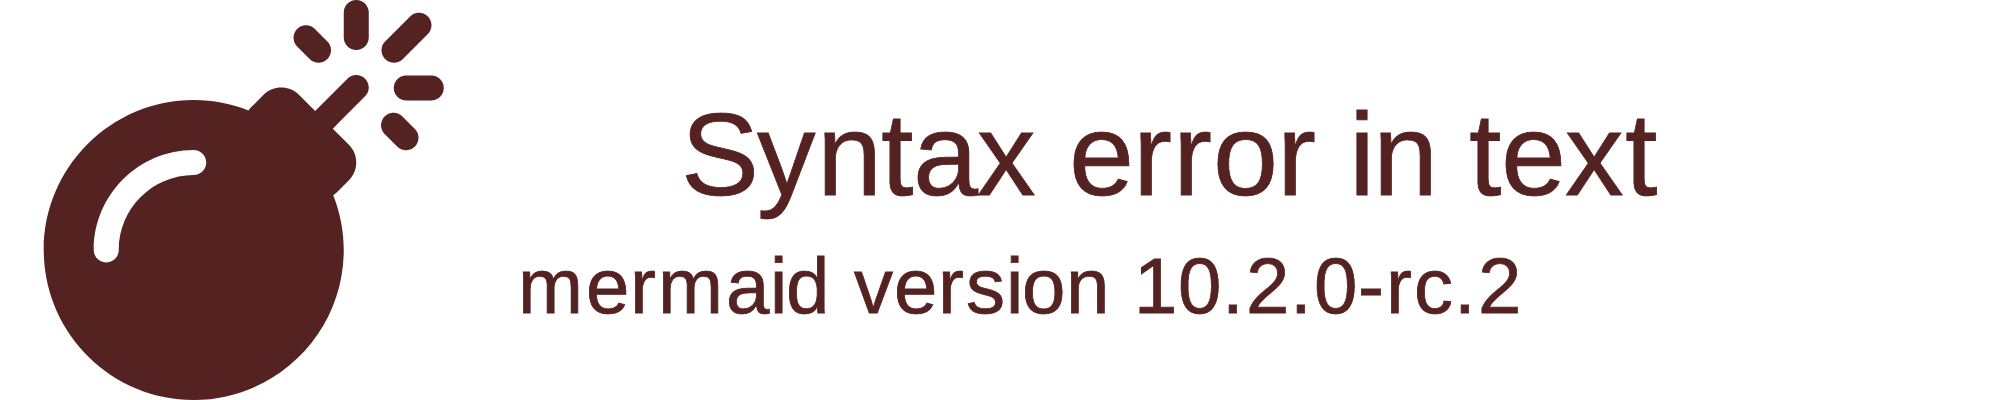

# Improt

In [8]:
import pandas as pd

# WeightedEnsembleModel(Caruana et al. 2004)

Weighted ensemble meta-model that implements Ensemble Selection

https://auto.gluon.ai/0.8.1/tutorials/multimodal/text_prediction/beginner_text.html#other-examples

In [32]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

In [33]:
from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
subsample_size = 1000  # subsample data for faster demo, try setting this to larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head(10)

Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet | Columns = 2 / 2 | Rows = 67349 -> 67349
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet | Columns = 2 / 2 | Rows = 872 -> 872

In [34]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = MultiModalPredictor(label='label', eval_metric='acc', path=model_path)
predictor.fit(train_data, time_limit=180)

=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.11.5
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #86~20.04.2-Ubuntu SMP Mon Jul 17 23:27:17 UTC 2023
CPU Count:          28
Pytorch Version:    2.0.1+cu117
CUDA Version:       11.7
Memory Avail:       139.10 GB / 251.39 GB (55.3%)
Disk Space Avail:   457.17 GB / 915.32 GB (49.9%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
    2 unique label values:  [1, 0]
    If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /home/csy/Dropbox/sy_hub/posts/2_Studies/GPT/

In [35]:
test_score = predictor.evaluate(test_data)
print(test_score)

{'acc': 0.8922018348623854}

In [36]:
test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(test_score)

{'acc': 0.8922018348623854, 'f1': 0.8929384965831435}

In [37]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0

In [38]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": [5.8611616e-04 9.9941385e-01]
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": [0.98935777 0.01064222]

In [39]:
test_predictions = predictor.predict(test_data)
test_predictions.head()

------------------------------------------------------------------------

In [41]:
from autogluon.core.models import WeightedEnsembleModel

In [42]:
model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = WeightedEnsembleModel(label='label', eval_metric='acc', path=model_path)
predictor.fit(train_data, time_limit=180)

In [35]:
test_score = predictor.evaluate(test_data)
print(test_score)

{'acc': 0.8922018348623854}

In [36]:
test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(test_score)

{'acc': 0.8922018348623854, 'f1': 0.8929384965831435}

In [37]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0

In [38]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": [5.8611616e-04 9.9941385e-01]
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": [0.98935777 0.01064222]

In [39]:
test_predictions = predictor.predict(test_data)
test_predictions.head()

Caruana, Rich, Alexandru Niculescu-Mizil, Geoff Crew, and Alex Ksikes.
2004. “Ensemble Selection from Libraries of Models.” In *Proceedings of
the Twenty-First International Conference on Machine Learning*, 18.